# Homework_2022_03_03

<font color=ff0000> 截止日期 3.20 中午 11:59</font>

首先请你创建矩阵$A, B, C, D$，它们都是服从标准正态分布的矩阵，其中$A$的大小为$20\times 40$，$B$的大小为$40\times 40$，$C$的大小为$40\times 1$, $D$的大小为$40 \times 1$.

In [1]:
import numpy as np
np.random.seed(1)
# TODO
A=np.random.randn(20,40)
B=np.random.randn(40,40)
C=np.random.randn(40,1)
D=np.random.randn(40,1)
# 不用print

### Q1.1（1分） 计算$R=A+A$, $R=A^TA$, $R=AB$, $R=B-I$。

In [4]:
# TODO
# 不用print
R1=A+A
R2=(A.T)@A
R3=A@B
I=np.eye(40)
R4=B-I

### Q1.2（1分）计算方程组的解。

$$
\left\{\begin{aligned}
2 x_{1}+x_{2}+x_{3} &=5 \\
3 x_{1}+2 x_{2}+ 2 x_{3} &=8 \\
x_{2}+2 x_{3} &=2
\end{aligned}\right.
$$

In [21]:
# TODO
a=np.array([[2,1,1],[3,2,2],[0,1,2]])
b=np.array([5,8,2])
x=np.linalg.inv(a)@b
print(np.array([x]).T)

[[2.]
 [0.]
 [1.]]


### Q1.3（2分）求解矩阵的特征值以及对应的特征向量。输出最大最小特征值以及对应的特征向量。并画出求出的特征向量。
使用np.linalg.eig。

In [44]:
R = np.array([[2,0],[0,3]])
# TODO
value,vector=np.linalg.eig(R)
vector=np.array(vector).T
mymax=max(value)
index1=(np.where(value==mymax))[0][0]
print(mymax,vector[index1])
mymin=min(value)
index2=np.where(value==mymin)[0][0]
print(mymin,vector[index2])


3.0 [0. 1.]
2.0 [1. 0.]


### 画出求出的特征向量。要求用quiver绘制箭头。

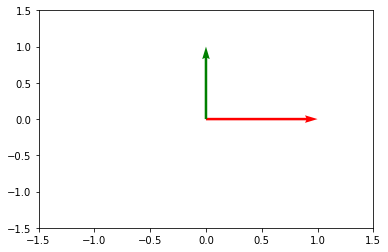

In [106]:
import matplotlib.pyplot as plt
# TODO
#特征向量的矩阵已经转置过
fig, ax = plt.subplots()
ax.quiver([0,0],[0,0],[vector[0][0],vector[0][1]],[vector[1][0],vector[1][1]],color=['r','g'],angles='xy', scale_units='xy', scale=1)    
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

### Q1.4（1分）给定两个矩阵，求Pearson相关系数。
Pearson相关系数，是用来判断两个变量线性相关程度的一个统计指标。
$cov(x,y)$表示$x$和$y$的协方差。$\sigma_x$和$\sigma_y$分别是$x$和$y$的标准差。

$$corr_{x,y}=\frac{cov(x,y)}{\sigma_x*\sigma_y}$$

要求用np.cov按照公式计算。

In [64]:
np.random.seed(1)

xy = np.random.randn(2, 10)
# TODO
x=xy[0]
y=xy[1]
corr=np.cov(x,y)/(np.std(x)*np.std(y))
print(corr)

[[1.32435978 0.72846413]
 [0.72846413 0.93219979]]


### Q1.5（1分）哈达玛矩阵。

哈达玛矩阵是由+1和-1元素构成的方阵，并且遵循：

$$H_{n}\otimes H_{n}^{T}=nI$$


$$H_1 = \frac{1}{\sqrt{2}}[\begin{matrix} 
1 &1\\ 
1 &-1 \\ \end{matrix}]$$

$$H_n = H_1 \otimes H_{n-1} = \frac{1}{\sqrt{2}}
[\begin{matrix} 
H_{n-1} &H_{n-1}\\ 
H_{n-1} &-H_{n-1} \\ \end{matrix}]
$$

哈达玛矩阵的阶数都是2的倍数。实现一个函数，可以输出$2^k$阶的哈达玛矩阵。
用np.hstack构建此矩阵，可以不必带上系数。

In [81]:
import math
def hada(k):
    # TODO
    h=np.array([[1,1],[1,-1]])
    #h=h/math.sqrt(2)
    for j in range(1,k):
        #print(h @ h.T)
        h1=np.vstack((h,h))
        h2=np.vstack((h,-h))
        h=np.hstack((h1,h2))
        #h=h/math.sqrt(2)
    
    return h
h8 = hada(3)
print(h8 @ h8.T)


[[8 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0]
 [0 0 0 8 0 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 8]]


### Q1.6（选做）（1分）将矩阵$a$转换成蛇形数组。请不要引入新的变量，所有变化操作都在$a$上进行。

In [120]:
a = np.arange(9).reshape(3, 3)
# TODO
print(a)
a[[1,2,2,1,1],[2,2,1,0,1]]=a[[1,1,1,2,2],[0,1,2,1,2]]
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [7 8 3]
 [6 5 4]]


### Q2.1（2分）实现课上讲的PCA降维，并要求取最大的两个特征值来恢复矩阵。

In [115]:
np.random.seed(1)

x = 7*np.random.rand(100)
y = 0.5*x + 1 + 3*np.random.rand(100)

X = np.hstack([x.reshape(100, 1), x.reshape(100, 1), y.reshape(100, 1), x.reshape(100, 1)])

def centerData(X):
    X = X.copy()
    X -= np.mean(X, axis=0)
    return X

X = centerData(X)
print(X[7][2])
# TODO
X_cov=np.cov(X.T)
values,vectors=np.linalg.eig(X_cov)
print(values)
print(vectors)
LargeTwoIndex=values.argsort()[-2:][::-1]
vectors=vectors.T
LargeTwoVectors=vectors[LargeTwoIndex]
print(LargeTwoVectors)
newone=X@LargeTwoVectors.T
reconstruct_X=newone@LargeTwoVectors
# END TODO
print(reconstruct_X[7][2])

0.8426843495317922
[ 1.39646893e+01  8.37318846e-01 -3.29411997e-18 -5.44305723e-16]
[[-5.52742735e-01  1.66759713e-01  9.09116163e-03  6.52738264e-01]
 [-5.52742735e-01  1.66759713e-01 -7.11608529e-01 -7.51162693e-01]
 [-2.88836296e-01 -9.57378501e-01 -9.17746283e-17 -7.12983616e-17]
 [-5.52742735e-01  1.66759713e-01  7.02517368e-01  9.84244288e-02]]
[[-0.55274274 -0.55274274 -0.2888363  -0.55274274]
 [ 0.16675971  0.16675971 -0.9573785   0.16675971]]
0.8426843495317919


### Q2.2（2分）用SVD奇异值分解来压缩矩阵。

SVD将原始的矩阵$Data$分解成三个矩阵$U$,$\Sigma$,和$V^T$，如果原始矩阵$Data$是$m$行$n$列，那么$U$,$\Sigma$,和$V^T$就分别是$m$行$m$列、$m$行$n$列和$n$行$n$列。

为了清晰起见，上述过程可以写成如下一行：$$Data_{m\times n}=U_{m\times m}\Sigma_{m \times n}V^T_{n\times n}$$

上述分解中会构建出一个矩阵$\Sigma$，该矩阵只有对角元素，其他元素均为0. 另一个惯例就是，$\Sigma$的对角元素是从大到小排列的。这些对角元素称为奇异值（Singular Value），它们就是矩阵$Data Data^{T}$特征值的平方根。

在科学工程中，一直存在这样一个普遍事实：在某个奇异值的数目（$r$个）之后，其他的奇异值都置为0.这就意味着数据集中仅有$r$个重要特征，而其余特征则都是噪声或冗余特征。

本题要求用如下结果来近似原矩阵
$$Data_{m\times n}\approx U_{m\times 3}\Sigma_{3 \times 3}V^T_{3\times n}$$

对矩阵$A$进行SVD分解，使用np.linalg.svd。

In [124]:
# TODO
# 不用print
print(A)
U,S,V=np.linalg.svd(A)
V1=V[0:3,:]
U1=U[:,0:3]
S0=S[0:3]
S1=np.diag(S0)
A6=U1@S1@V1
print(A6)

[[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
   8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
   3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
  -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
  -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
  -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
   9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
  -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
  -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
  -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01]
 [-1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
   5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
   1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
  -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
   8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
  -7.5439